<a href="https://colab.research.google.com/github/Renua-Meireles/Dinamic-Convolution/blob/main/Dynamic-Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho prático da disciplina de **Processamento Digital de Sinais**


---


Aplicação desenvolvida: **Ferramenta para visualização dinâmica de convolução em imagens com auxílio gestual**

> Discente: **Renuá Meireles Almeida**<br/>
> Matrícula: **201733840018**<br/>
> Docente: **Cleison Daniel Silva**



## Convolução

&ensp;&ensp;&ensp;&ensp;A **convolução** é uma técnica é muito utilizada para se criar **filtros digitais** em processamento de sinais, definição de correlação em estatística, entre outros.

&ensp;&ensp;&ensp;&ensp;Atualmente ouve-se muito o termo convolução em técnicas de **Aprendizagem de Máquina**, principalmente em **Redes Neurais Convolucionais**, que conseguem adaptar e aprimorar o processo de convolução de modo a **extrair** diferentes tipos de características e informações relevantes de imagens

&ensp;&ensp;&ensp;&ensp;Matematicamente, convolução é uma operação de somatório do produto entre duas funções, ao longo da região em que elas se sobrepõem, em razão do deslocamento existente entre elas. Na computação, utiliza-se o cálculo discreto, que realiza um somatório do produto:

$$(f*g)[k] = \sum_{i=0}^{k}f[k].g[k-i]$$

&ensp;&ensp;&ensp;&ensp;Quando se trata de utilizar a convolução em processamento de imagens, são necessários dois somatórios pois temos duas dimensões (altura e largura), onde temos:

$$(f*g)[x, y] = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}f[i,j].g[x-i, j-j]$$

&ensp;&ensp;&ensp;&ensp;Neste caso a convolução tem o papel de fazer uma filtragem para extração de informações de interesse na imagem. Mais especificamente, o uso de filtros espaciais lineares é feito através de matrizes denominadas máscaras ou **kernels**. 

&ensp;&ensp;&ensp;&ensp;Durante a aplicação da convolução em uma imagem, o kernel vai se **deslocando ao longo da imagem**, como uma janela móvel, que vai **multiplicando e somando os valores sobrepostos**. Estes comportamentos podem ser visualizados e detalhados na imagem e na animação a seguir.

<p align="center">
  <img src=https://drive.google.com/uc?export=view&id=1MPKFshDWUvvlWKnfpwf2l-aitzm5l5lU  alt="Demostração convolução" width=500/>
</p>

<p align="center">
  <img src=https://drive.google.com/uc?export=view&id=1Pbagjy4-w58sr-StyTkVGOwsR7VTP_dx  alt="Demostração convolução" width=500/>
</p>

## Exemplo em Python (OpenCv + Numpy)

- Carregando pacotes necessários e baixando imagem exemplo

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
!curl -o image.jpg https://blog.deliverymuch.com.br/wp-content/uploads/2020/02/O-que-falta-em-uma-cidade-pequena-750x410.jpg
img = cv2.imread("image.jpg")

- Definindo kernels

In [15]:
identity = np.array([     
  [0., 0., 0.],
  [0., 1., 0.],
  [0., 0., 0.] 
])

sharpen = np.array([
  [-1., -1., -1.],
  [-1.,  9., -1.],
  [-1., -1., -1.]
])

edge_detection = np.array([
    [-1.,-1., -1.],
    [-1., 8., -1.],
    [-1.,-1., -1.]
])

kernels = [(identity, 'Normal'), (sharpen, 'Afiado'), (edge_detection, 'Detecção de Bordas')]

- Aplicando kernels na imagem exemplo


 *** NORMAL ***
 Kernel:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


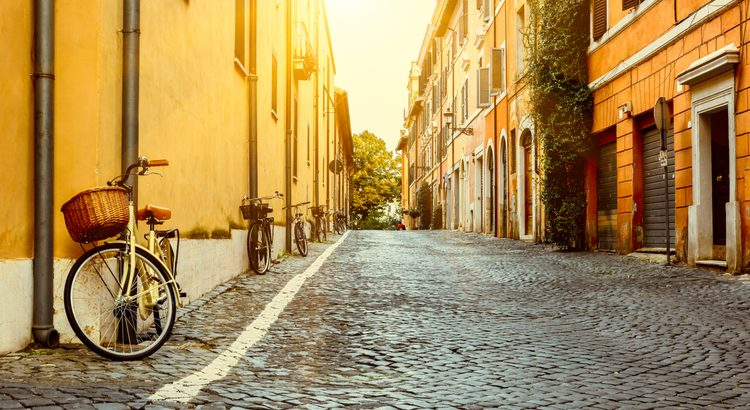


 *** AFIADO ***
 Kernel:
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


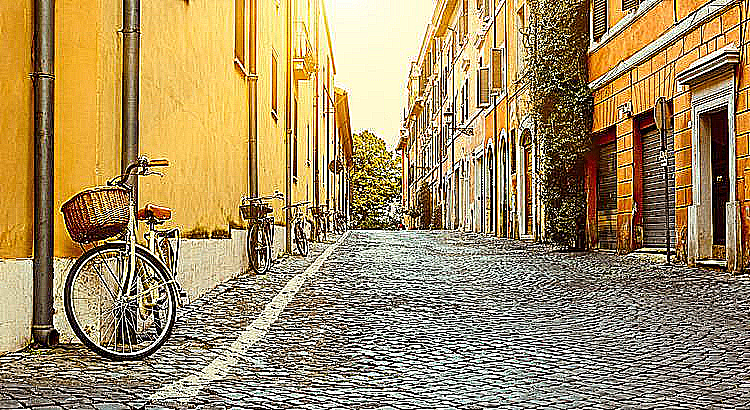


 *** DETECÇÃO DE BORDAS ***
 Kernel:
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


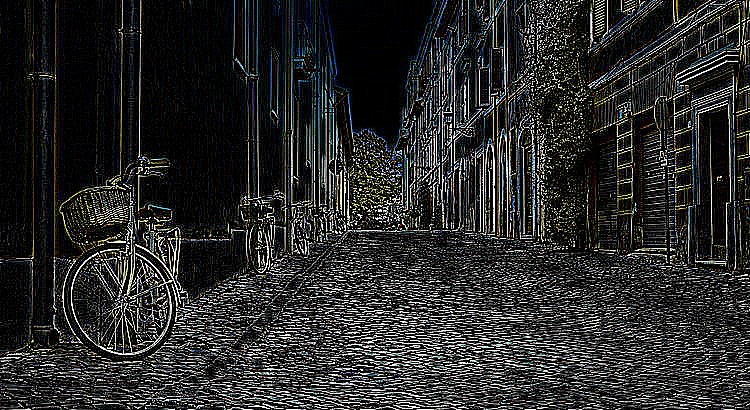

In [14]:
for kernel, nome in kernels:
  print(f'\n *** {nome.upper()} ***\n Kernel:\n{kernel}')
  cv2_imshow(cv2.filter2D(img, -1, kernel))

## Aplicação desenvolvida


---


&ensp;&ensp;&ensp;&ensp;*A aplicação consiste na visualização do efeito da convolução entre kernels definidos pelo usuário e o vídeo captado dinâmicamente. As instruções de seleção e definição de kernel são realizadas através de gestos com as mãos.*
</br></br>
O **código fonte** da aplicação pode ser encontrado no [GitHub](https://github.com/Renua-Meireles).

- **Interface**

  A interface é composta pela possibilidade de seleção de **duas opções de funcionalidade**, que são:
  
<p align="center">
  <img src=https://drive.google.com/uc?export=view&id=1MVhbr4IrFTFMNC6rCKQ4ht5XQFuvdOSu  alt="Seleção de funcionalidades" width=1000/>
</p>

  1. **Kernel Personalizável**

    > Nesta opção é possível **personalizar os valores** de um kernel e visualizar dinamicamente o efeito de sua aplicação no vídeo captado.

  2. **Seleção de Kernel pré-definido**
    > Nesta opção é possível **escolher** um dentre uma série de kernels existentes com funções de extrair características específicas de imagens.

- **Demostração de Funcionalidades**

 1. **Kernel Personalizável**
> Com a **ponta do dedo indicador erguido** é possível **decrementar** um valor do kernel, já com a **ponta do dedo midinho erquido**, é possível realizar o **incremento**. <br> \* Estas operações não ocorrem se mais dedos estiverem erguidos.

 <p align="center">
  <img src=https://drive.google.com/uc?export=view&id=1RxN2gw4iH9l4Lst3QeESK5kB3daAXgI-  alt="Personalizando Kernel" width=1000/>
</p>

 2. **Seleção de Kernel pré-definido**

 <p align="center">
  <img src=https://drive.google.com/uc?export=view&id=1D4ngwBd05BL-VIgiQHhf4Z-6kKolC1Hx  alt="Selecionando Kernels" width=1000/>
</p>

# Referências


---


BIANCHI, Alexandre Luiz. **Entendendo de vez a convolução: base para processamento de imagens**. Disponível [aqui](https://www.viceri.com.br/insights/entendendo-de-vez-a-convolucao-base-para-processamento-de-imagens). Acesso em: 08 de Junho de 2021.


BORCAN, Marius. **Python OpenCV: construção de filtros de imagens semelhantes ao Instagram**. Disponível [aqui](https://ichi.pro/pt/python-opencv-construcao-de-filtros-de-imagens-semelhantes-ao-instagram-101465047453817). Acesso em: 08 de Junho de 2021.

DIVISÃO DE PROCESSAMENTO DE IMAGENS. **Teoria: Processamento de Imagens**. Disponível [aqui](http://www.dpi.inpe.br/spring/teoria/filtrage/filtragem.htm). Acesso em: 08 de Junho de 2021.

GANESH, Prakhar. **Types of Convolution Kernels: Simplified**. Disponível [aqui](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37). Acesso em: 08 de Junho de 2021.